# Estimate forcing for 1pctCO2 using parameters obtained from abrupt-4xCO2

## This file should be updated to use the functions defined in "my_functions"

In [15]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

plot_allvar = False
plot_tasandN = False
plot_modes = False

saveforcingdata = False # create one file for each model/member, combine them later if needed
saveforcingfigure = False


## Find models with both abrupt-4xCO2 and 1pctCO2 experiments

In [2]:

experiments = {}
directory = '../Processed_data/Global_annual_anomalies/'
model_names = [ f.name for f in os.scandir(directory) if f.is_dir() and f.name !='.ipynb_checkpoints']
model_names.sort()

no_experiments = []

for model in model_names:
    experiments[model] = {}
    modeldirectory = os.path.join(directory, model)
    modelexp_names = [ f.name for f in os.scandir(modeldirectory) if f.is_dir() and f.name !='.ipynb_checkpoints']
    for exp in modelexp_names:
        if exp in ['abrupt-4xCO2', '1pctCO2']:
            experiments[model][exp] = {}
            modelexpdirectory = os.path.join(modeldirectory, exp)
            filenames = [f.name for f in os.scandir(modelexpdirectory) if f.name !='.ipynb_checkpoints']

            members = [file.rsplit('_')[2] for file in filenames]
            members.sort()
            experiments[model][exp] = members
    if bool(experiments[model]) == False: # delete element if empty
        no_experiments.append(model)
        del experiments[model]
        
print(len(model_names) - len(experiments), 'models do not have any of these experiments:', no_experiments)
#experiments # prints all members of these exps


6 models do not have any of these experiments: ['AWI-ESM-1-1-LR', 'E3SM-1-1', 'E3SM-1-1-ECA', 'EC-Earth3-Veg-LR', 'GISS-E2-1-G-CC', 'NorESM1-F']


In [3]:
# print common members for experiments.
# not relevant yet: if no common members, check manually if there are different members branching from the same control run
# (alternatively: average over all members?)
common_members = {}
for model in experiments:
    experiments[model]
    if 'abrupt-4xCO2' in experiments[model] and '1pctCO2' in experiments[model]:
        #print(model, 'ok')
        common_members[model] = set(experiments[model]['abrupt-4xCO2']).intersection(set(experiments[model]['1pctCO2']))
        print(model, 'has member(s)', common_members[model], 'for both experiments')
    else:
        print(model, 'has only one of the these experiments:', experiments[model])
        


ACCESS-CM2 has member(s) {'r1i1p1f1'} for both experiments
ACCESS-ESM1-5 has member(s) {'r1i1p1f1'} for both experiments
AWI-CM-1-1-MR has member(s) {'r1i1p1f1'} for both experiments
BCC-CSM2-MR has member(s) {'r1i1p1f1'} for both experiments
BCC-ESM1 has member(s) {'r1i1p1f1'} for both experiments
CAMS-CSM1-0 has member(s) {'r1i1p1f1', 'r2i1p1f1'} for both experiments
CAS-ESM2-0 has member(s) {'r1i1p1f1'} for both experiments
CESM2 has member(s) {'r1i1p1f1'} for both experiments
CESM2-FV2 has member(s) {'r1i1p1f1'} for both experiments
CESM2-WACCM has member(s) {'r1i1p1f1'} for both experiments
CESM2-WACCM-FV2 has member(s) {'r1i1p1f1'} for both experiments
CIESM has member(s) {'r1i1p1f1'} for both experiments
CMCC-CM2-SR5 has member(s) {'r1i1p1f1'} for both experiments
CNRM-CM6-1 has member(s) {'r1i1p1f2'} for both experiments
CNRM-CM6-1-HR has member(s) {'r1i1p1f2'} for both experiments
CNRM-ESM2-1 has member(s) {'r2i1p1f2', 'r3i1p1f2', 'r1i1p1f2'} for both experiments
CanESM5 has m

In [4]:
common_members

{'ACCESS-CM2': {'r1i1p1f1'},
 'ACCESS-ESM1-5': {'r1i1p1f1'},
 'AWI-CM-1-1-MR': {'r1i1p1f1'},
 'BCC-CSM2-MR': {'r1i1p1f1'},
 'BCC-ESM1': {'r1i1p1f1'},
 'CAMS-CSM1-0': {'r1i1p1f1', 'r2i1p1f1'},
 'CAS-ESM2-0': {'r1i1p1f1'},
 'CESM2': {'r1i1p1f1'},
 'CESM2-FV2': {'r1i1p1f1'},
 'CESM2-WACCM': {'r1i1p1f1'},
 'CESM2-WACCM-FV2': {'r1i1p1f1'},
 'CIESM': {'r1i1p1f1'},
 'CMCC-CM2-SR5': {'r1i1p1f1'},
 'CNRM-CM6-1': {'r1i1p1f2'},
 'CNRM-CM6-1-HR': {'r1i1p1f2'},
 'CNRM-ESM2-1': {'r1i1p1f2', 'r2i1p1f2', 'r3i1p1f2'},
 'CanESM5': {'r1i1p1f1', 'r1i1p2f1'},
 'E3SM-1-0': {'r1i1p1f1'},
 'EC-Earth3': {'r3i1p1f1'},
 'FGOALS-g3': {'r1i1p1f1'},
 'FIO-ESM-2-0': {'r1i1p1f1', 'r2i1p1f1', 'r3i1p1f1'},
 'GFDL-CM4': {'r1i1p1f1'},
 'GFDL-ESM4': {'r1i1p1f1'},
 'GISS-E2-1-G': {'r102i1p1f1', 'r1i1p1f1', 'r1i1p3f1', 'r1i1p5f1'},
 'GISS-E2-1-H': {'r1i1p1f1'},
 'GISS-E2-2-G': {'r1i1p1f1'},
 'HadGEM3-GC31-LL': {'r1i1p1f3'},
 'HadGEM3-GC31-MM': {'r1i1p1f3'},
 'IITM-ESM': {'r1i1p1f1'},
 'INM-CM4-8': {'r1i1p1f1'},
 'INM-CM5-0'

In [14]:
# select model and member:
model = 'UKESM1-0-LL'; member = list(common_members[model])[0]
member

'r1i1p1f2'

/Users/hege-beatefredriksen/anaconda3/envs/CMIP6_hege/lib/python3.6/site-packages/ipykernel_launcher.py:168: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/hege-beatefredriksen/anaconda3/envs/CMIP6_hege/lib/python3.6/site-packages/ipykernel_launcher.py:168: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/hege-beatefredriksen/anaconda3/envs/CMIP6_hege/lib/python3.6/site-packages/ipykernel_launcher.py:168: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are re

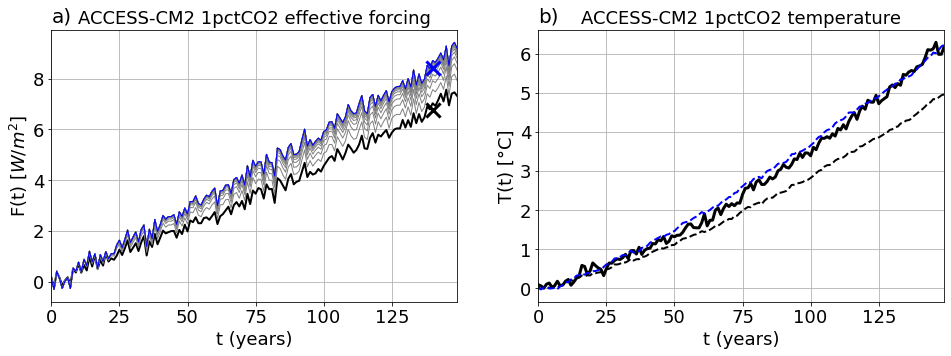

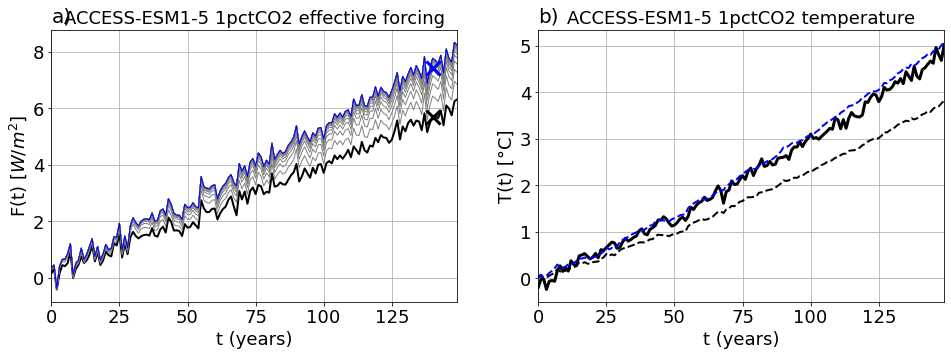

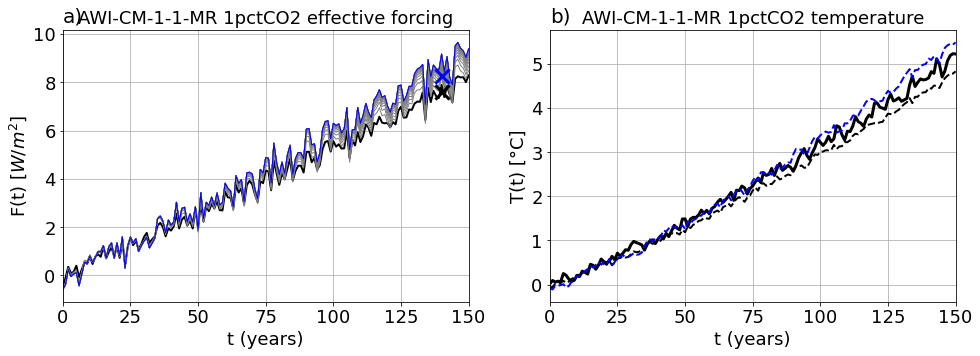

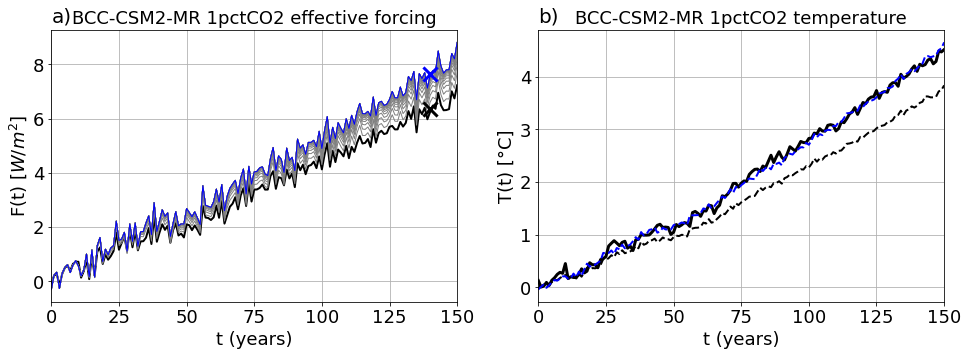

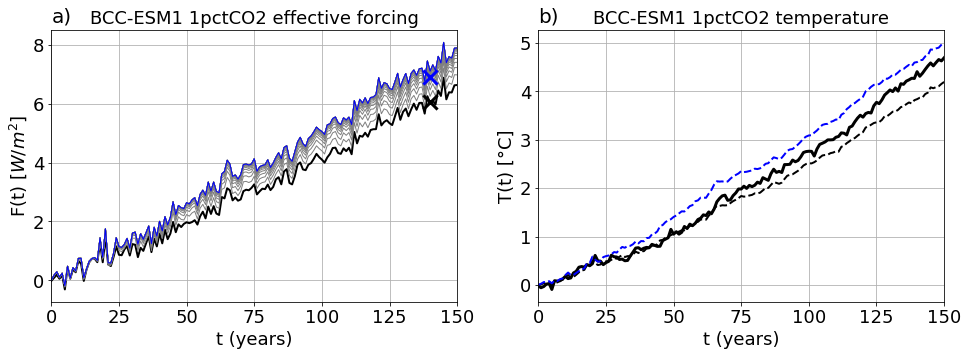

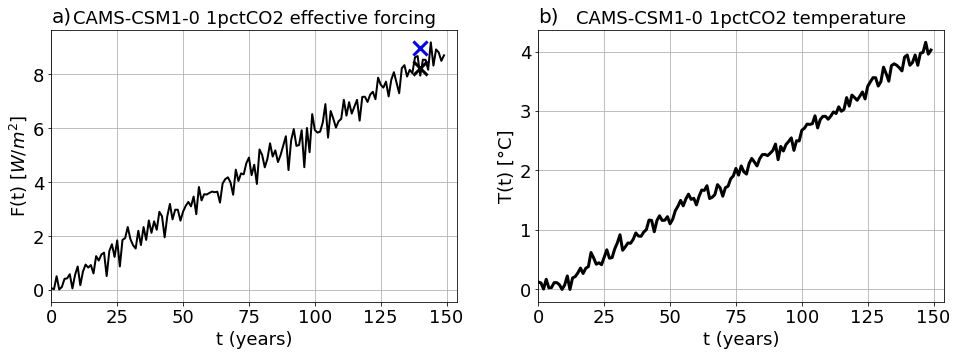

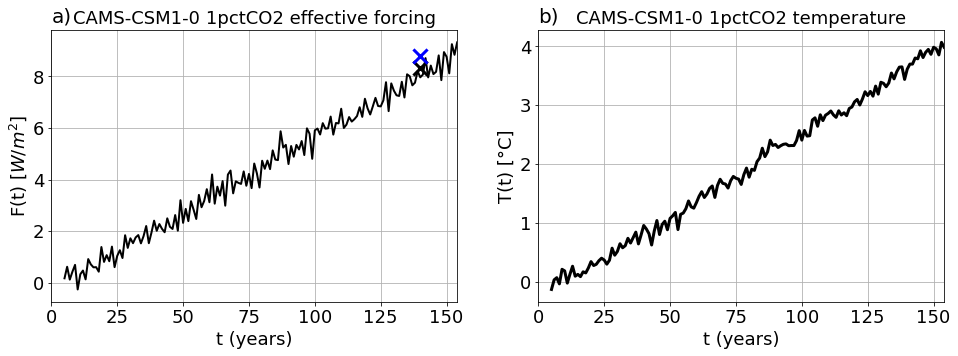

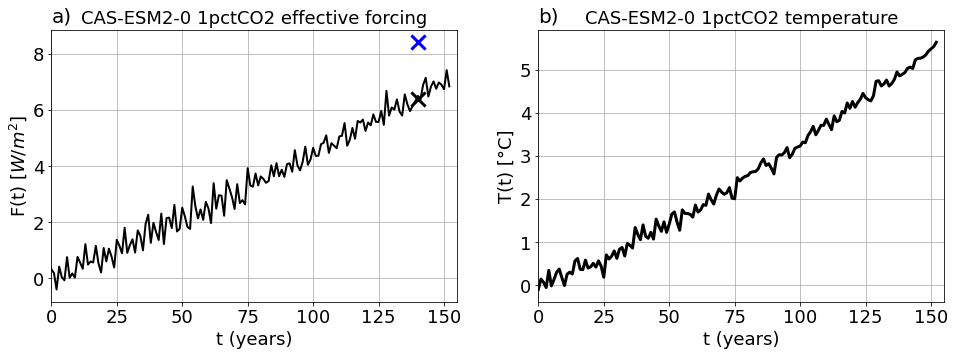

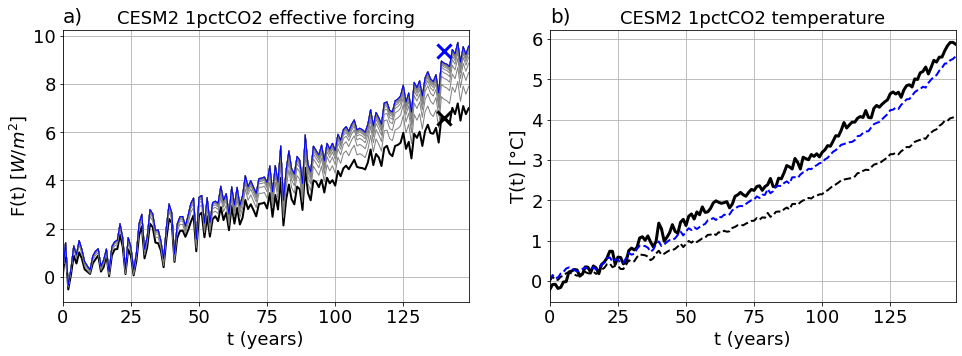

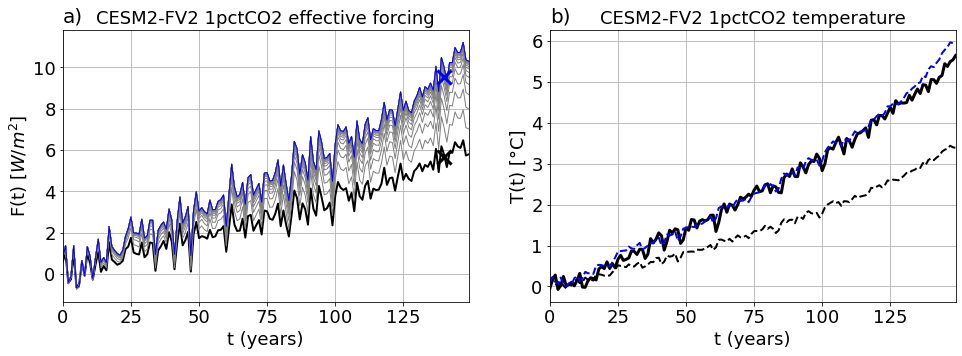

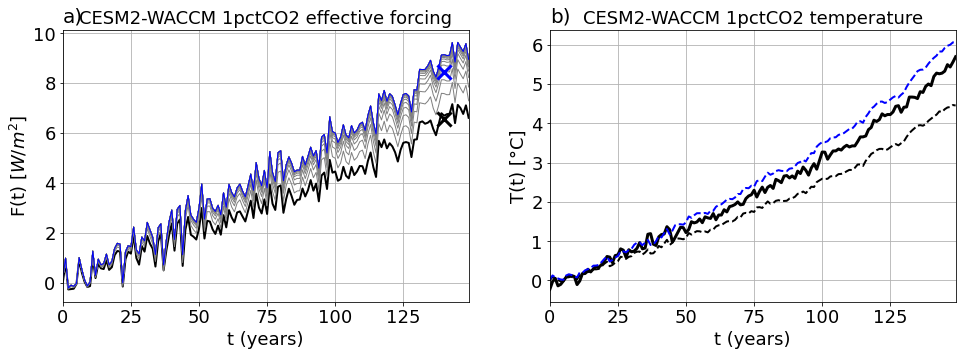

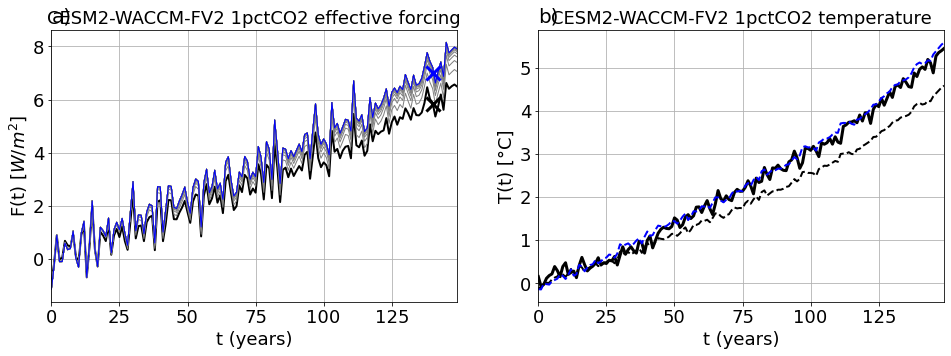

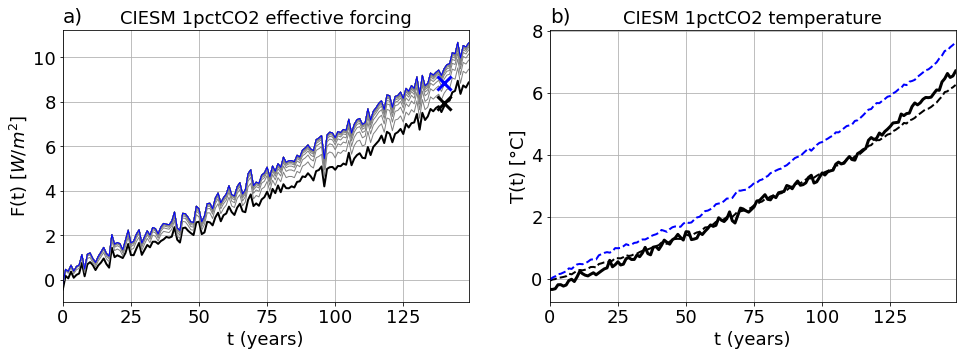

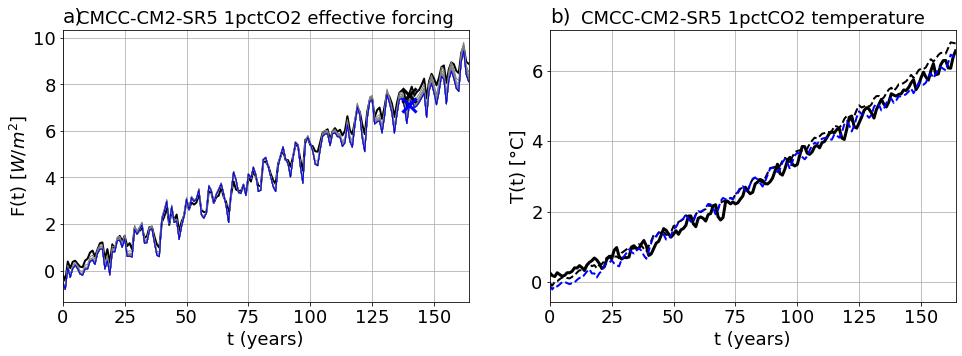

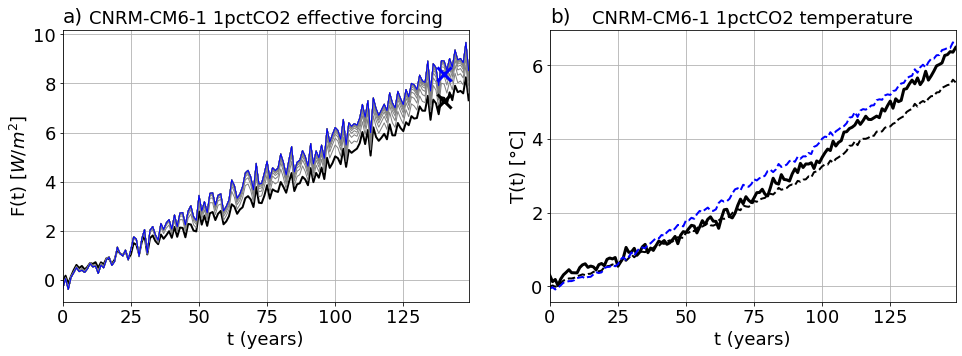

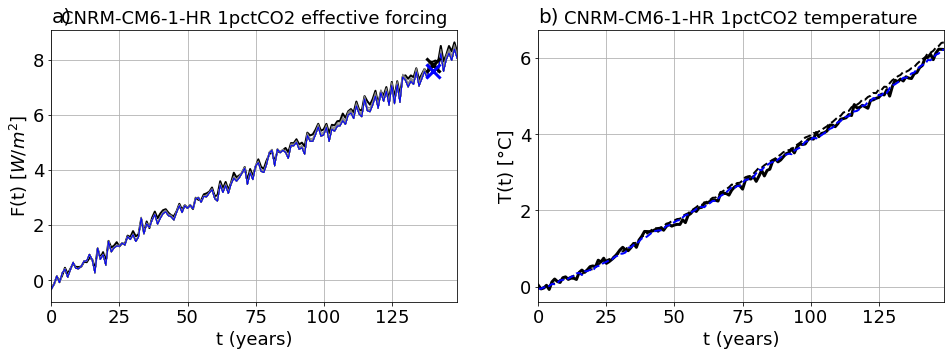

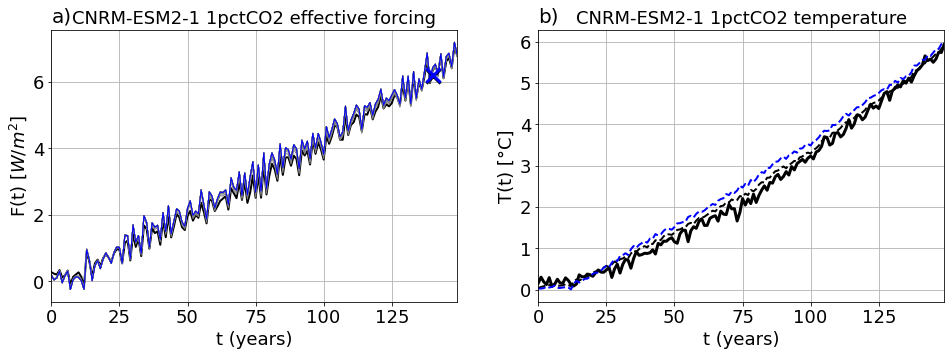

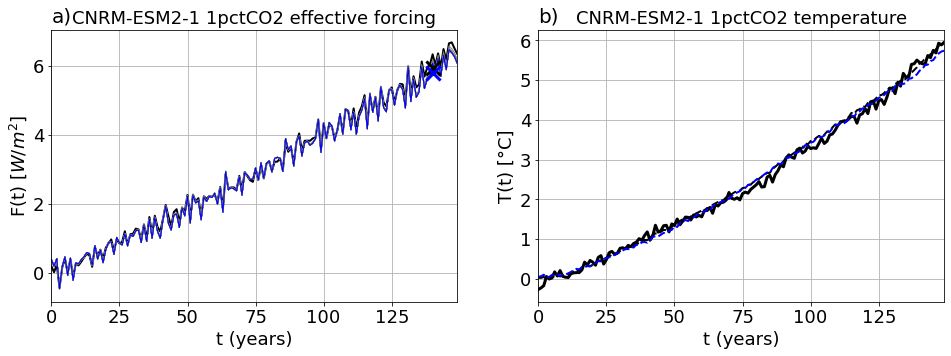

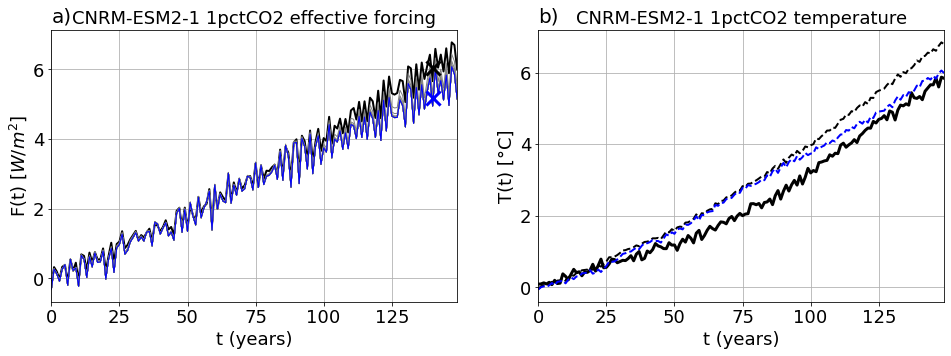

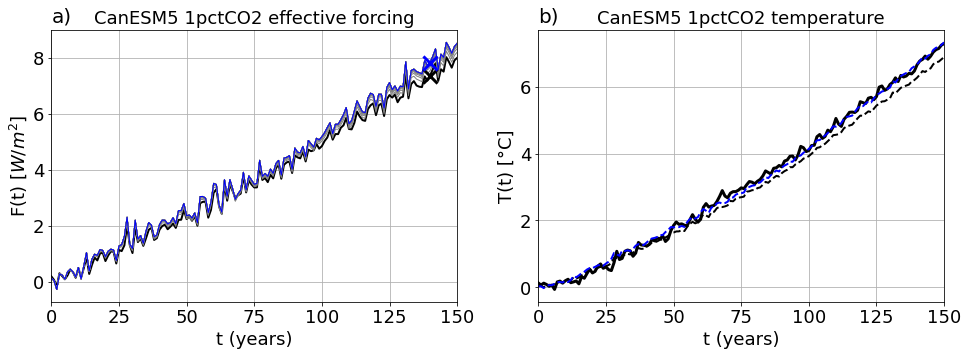

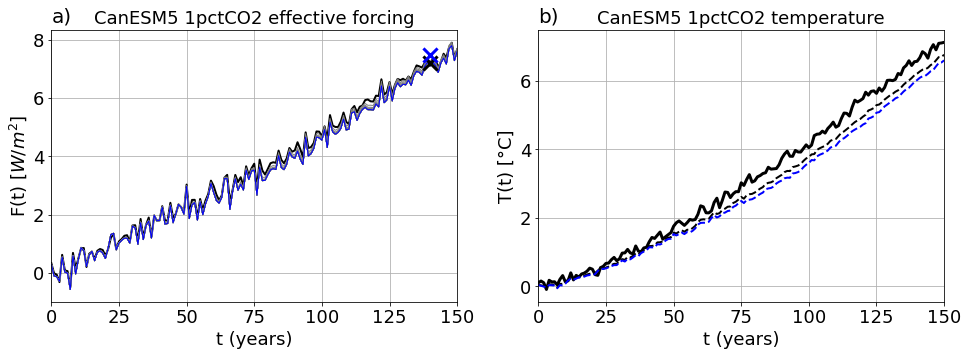

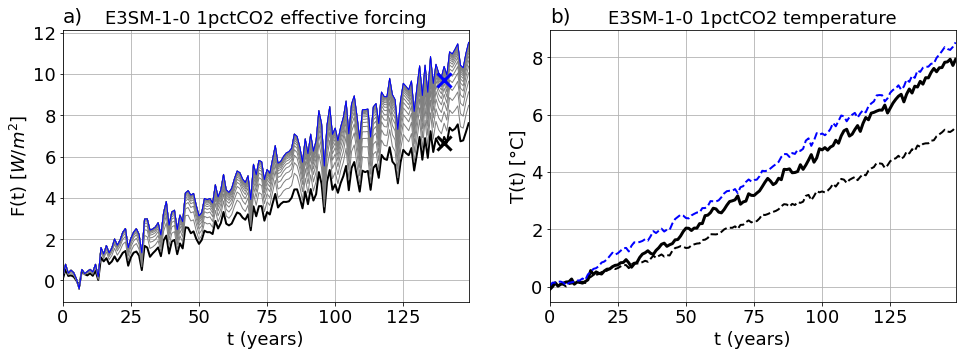

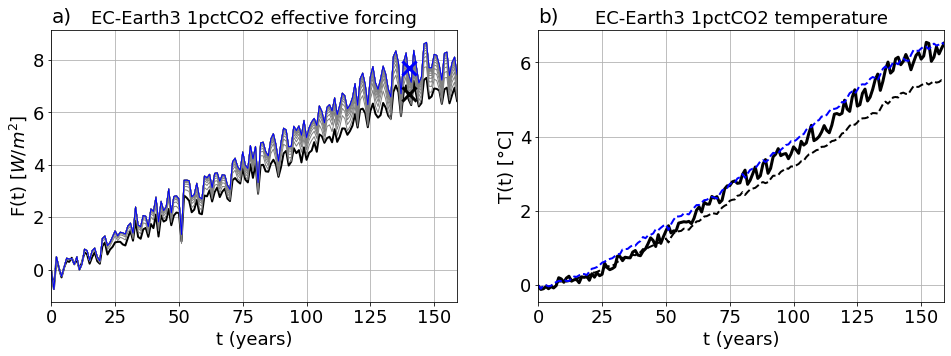

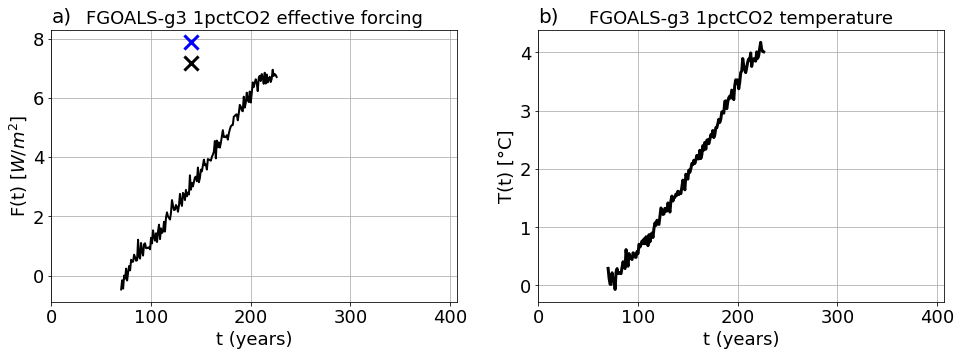

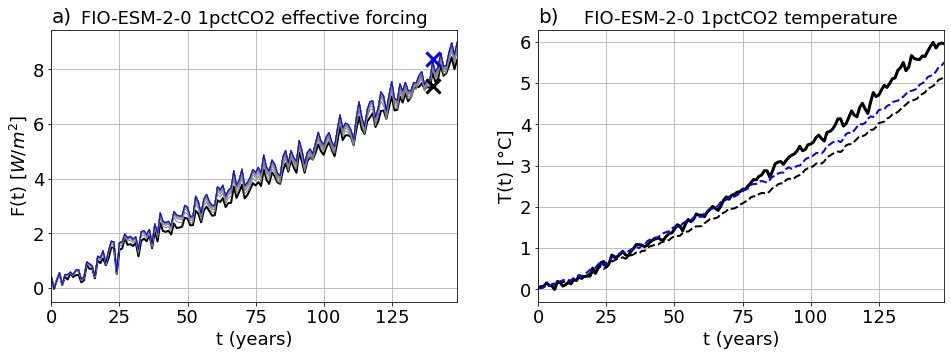

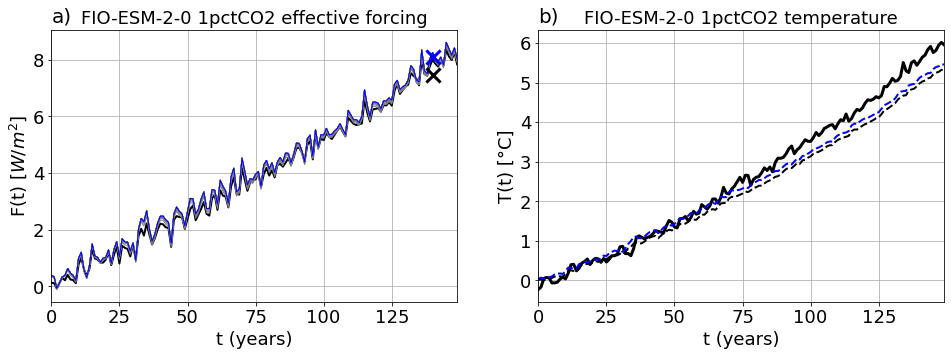

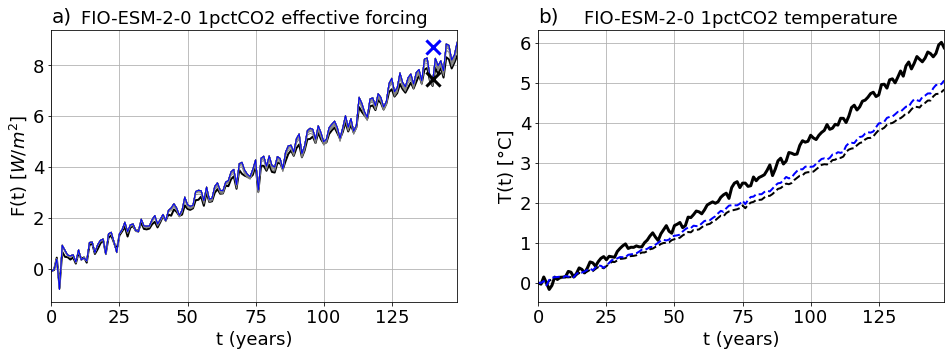

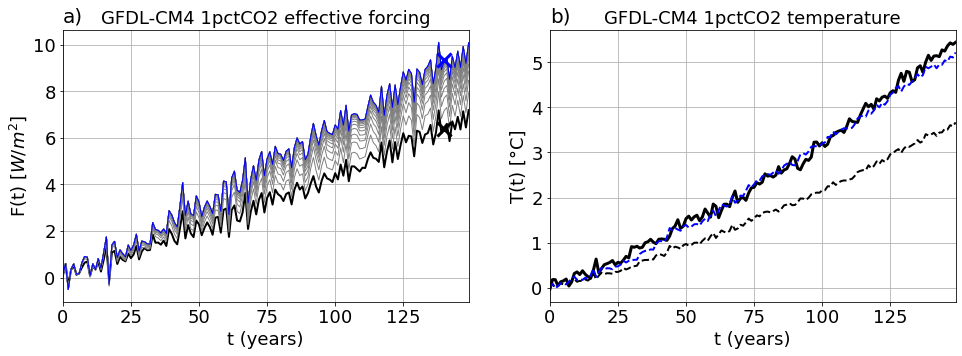

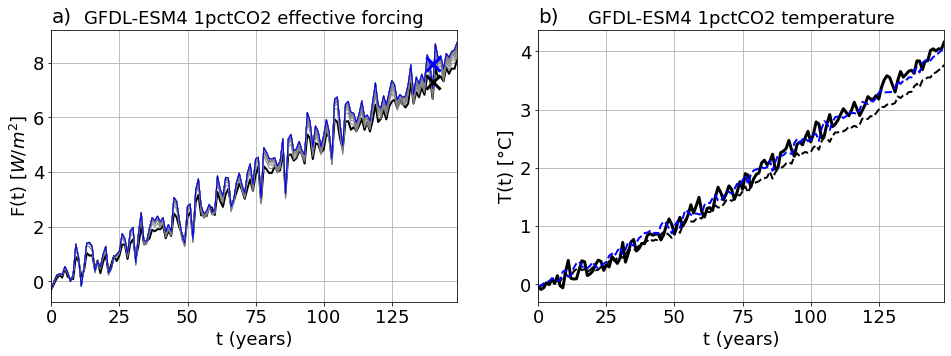

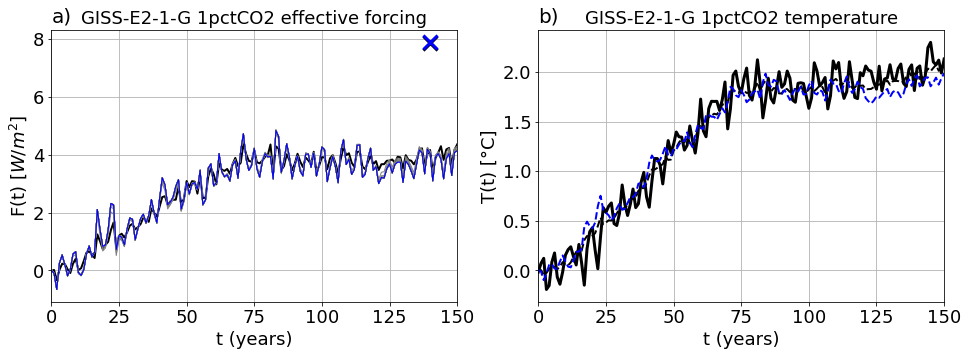

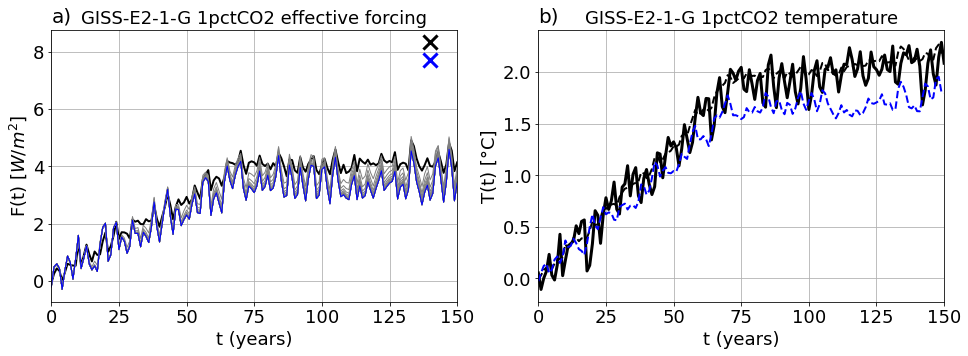

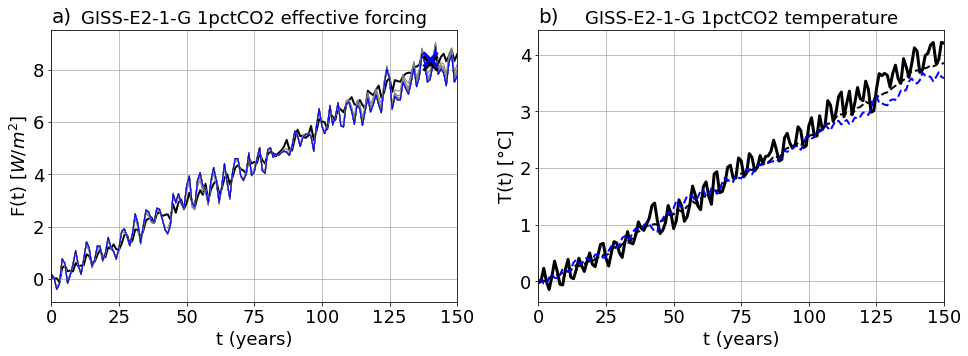

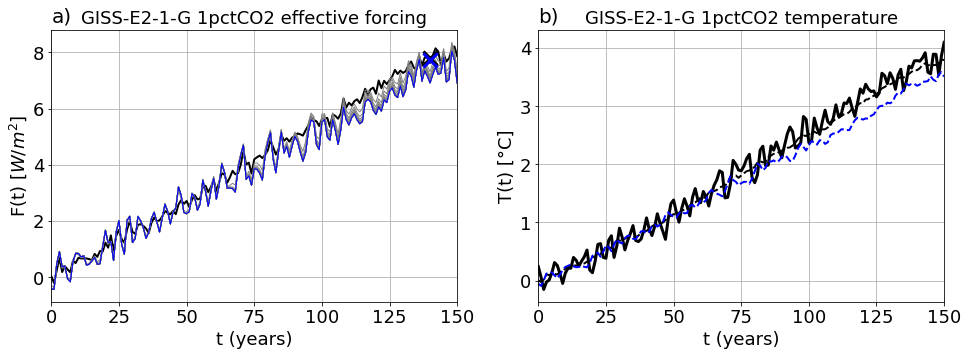

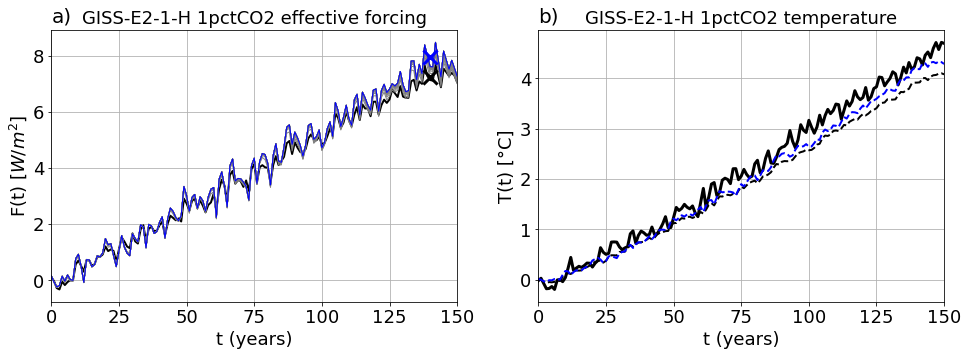

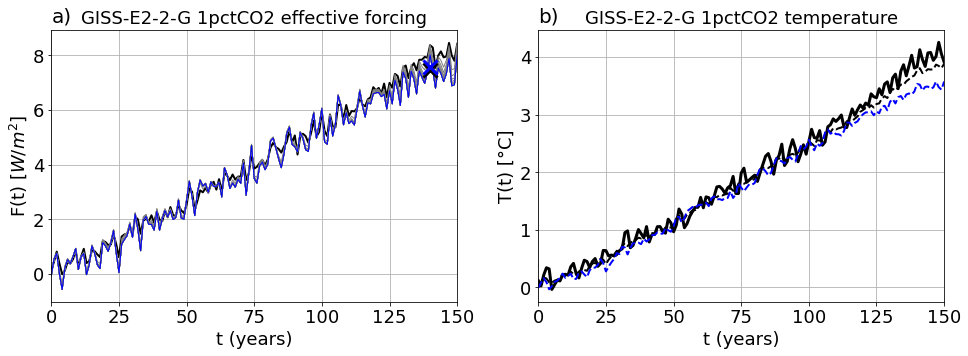

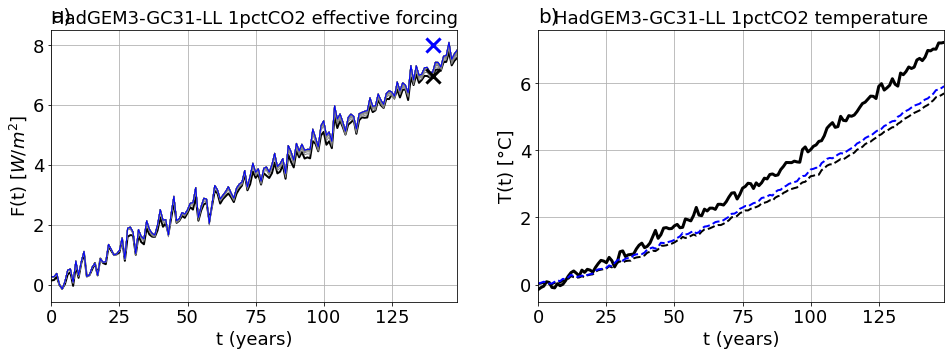

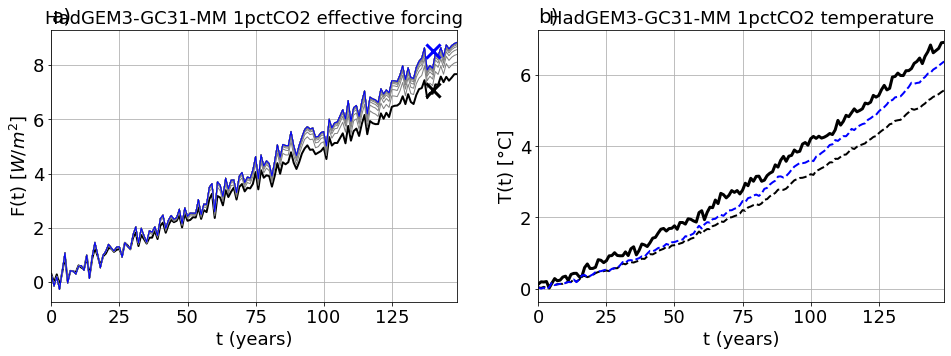

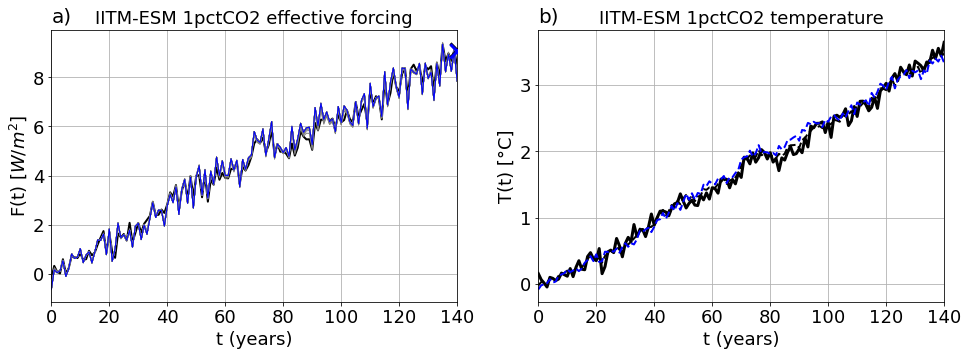

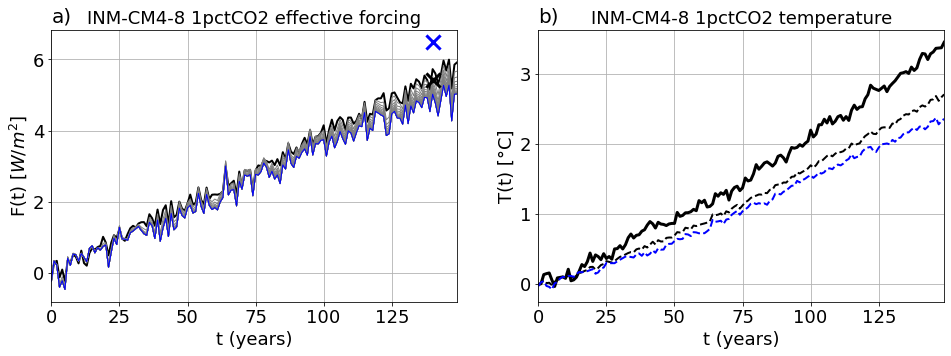

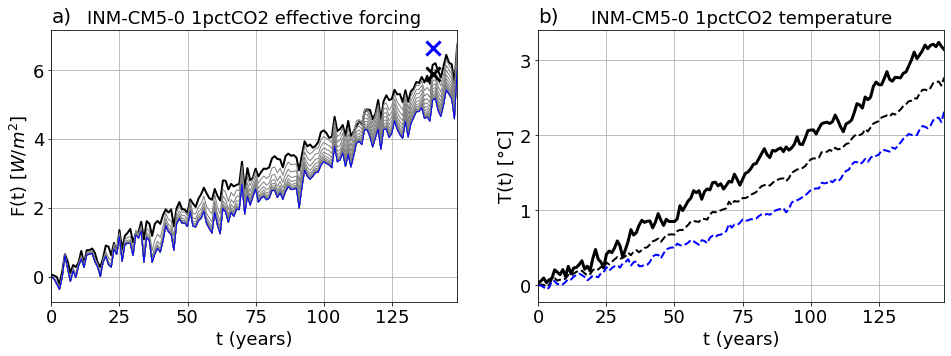

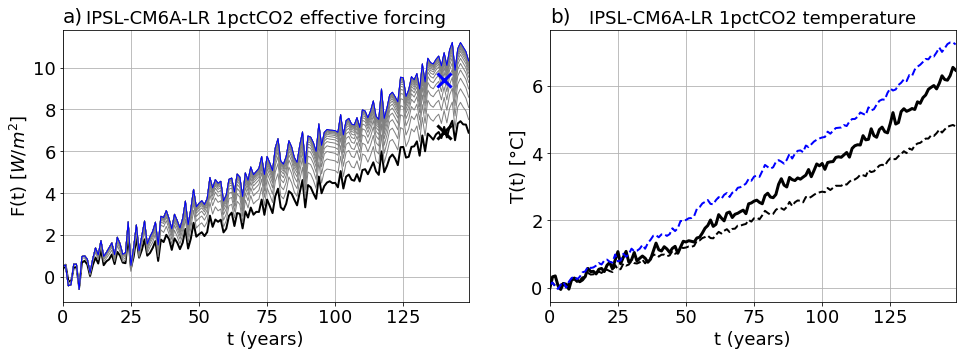

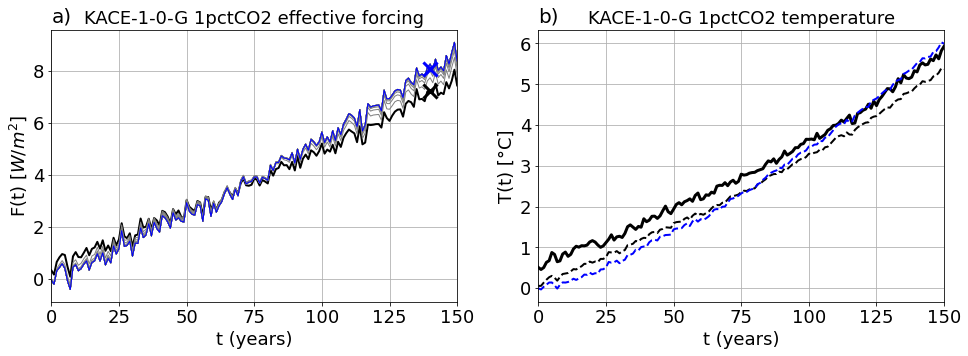

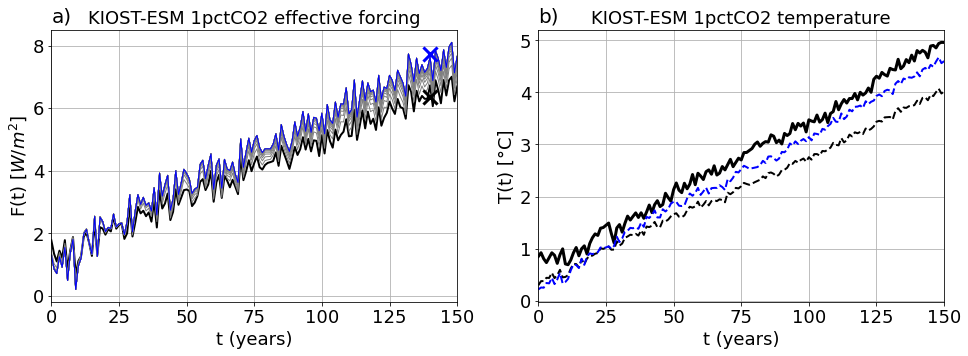

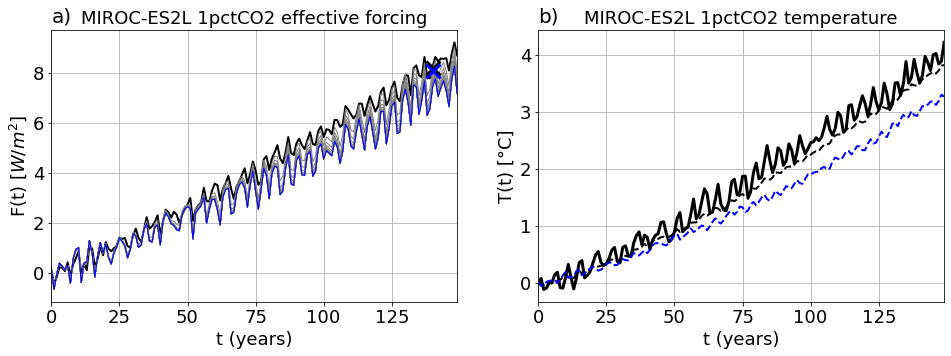

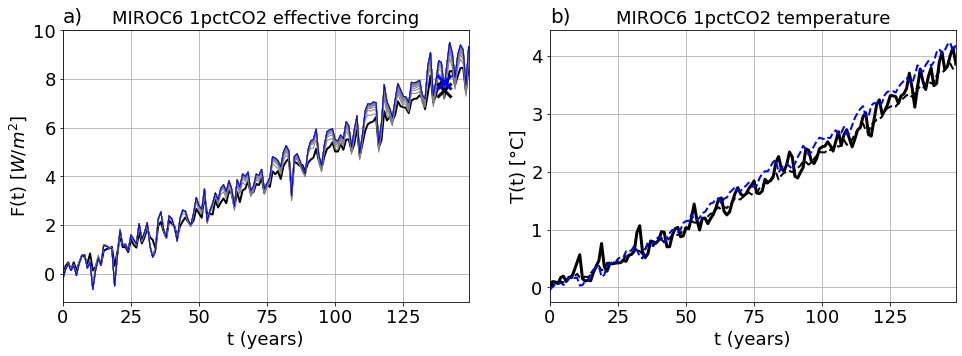

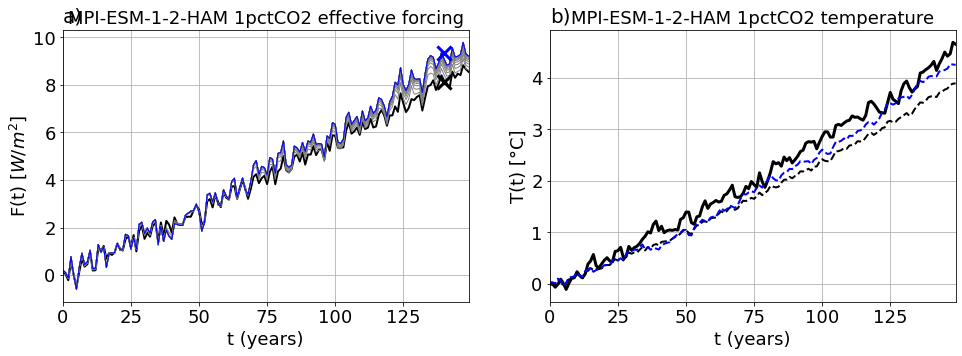

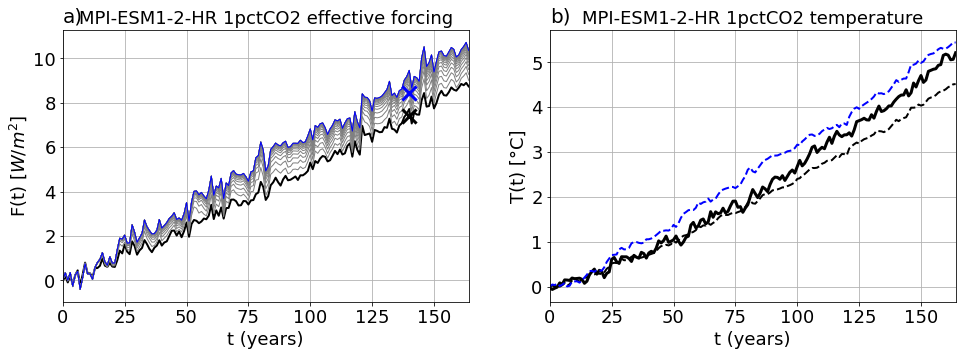

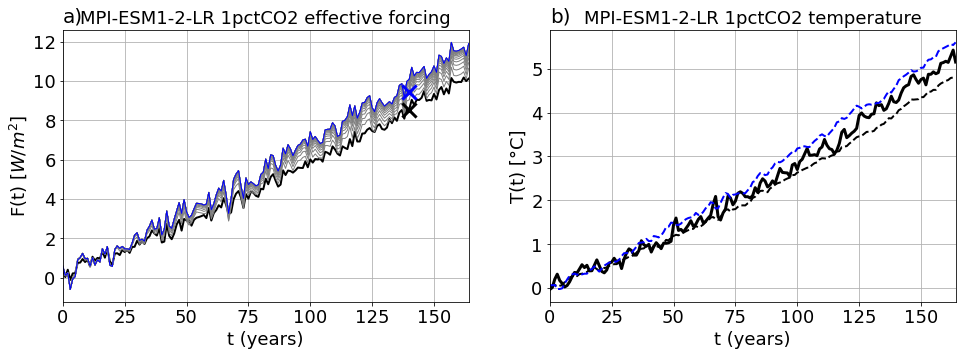

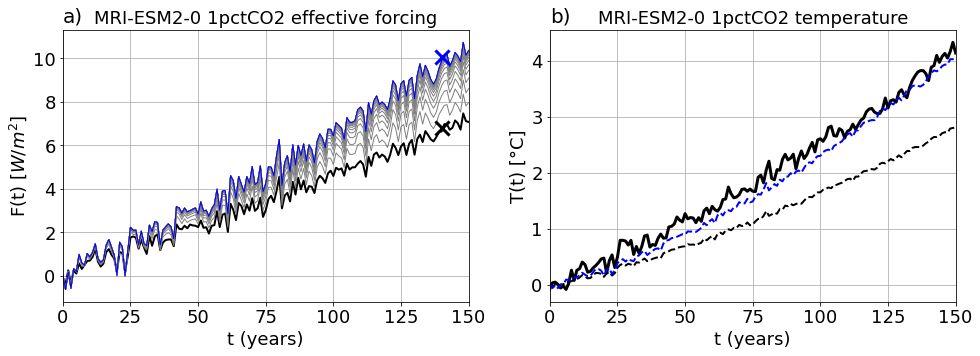

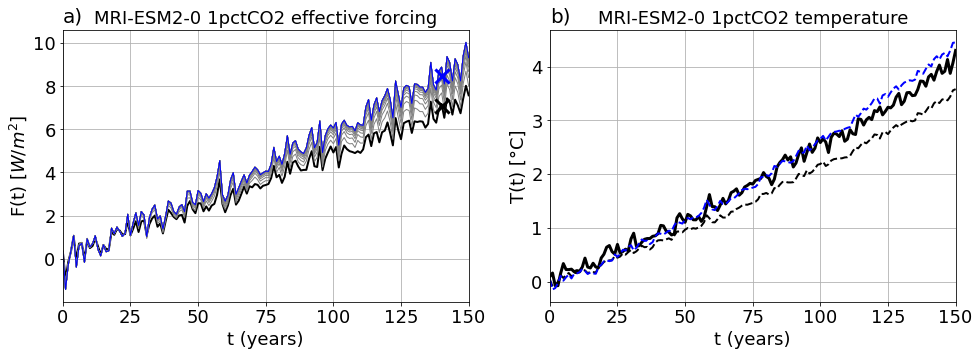

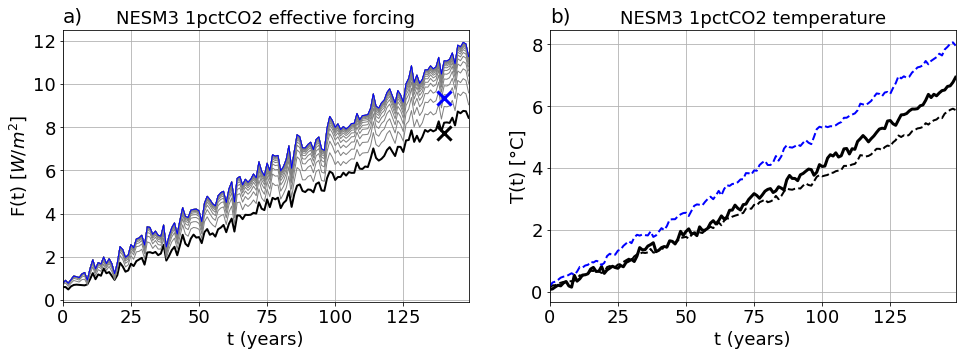

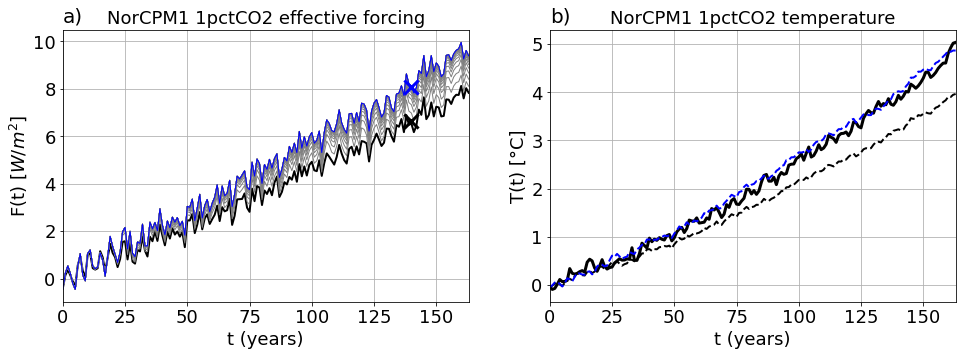

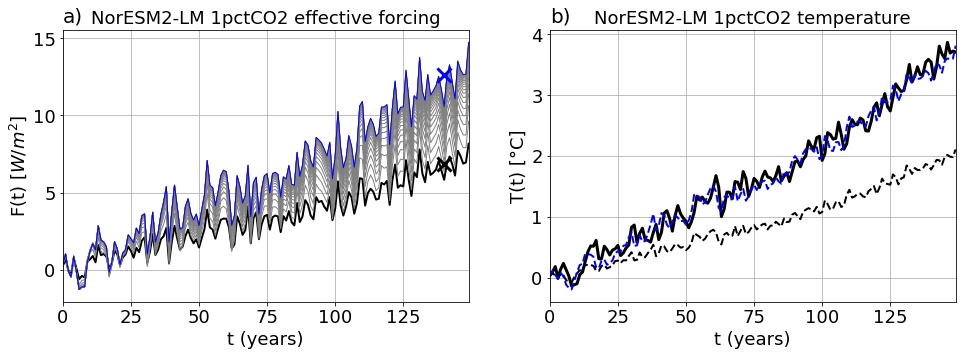

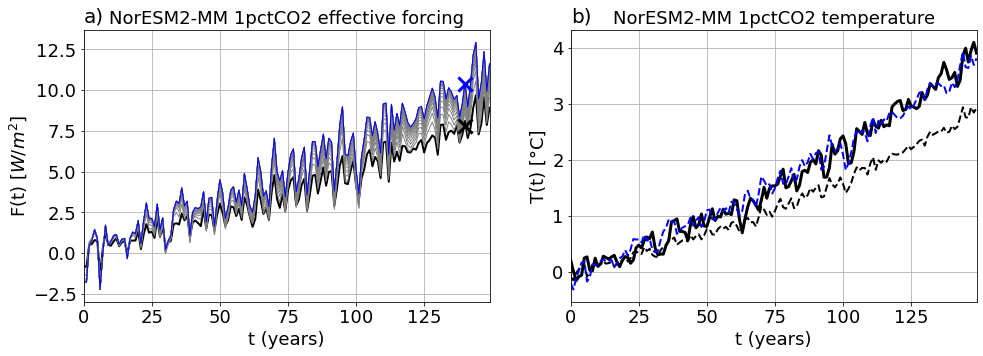

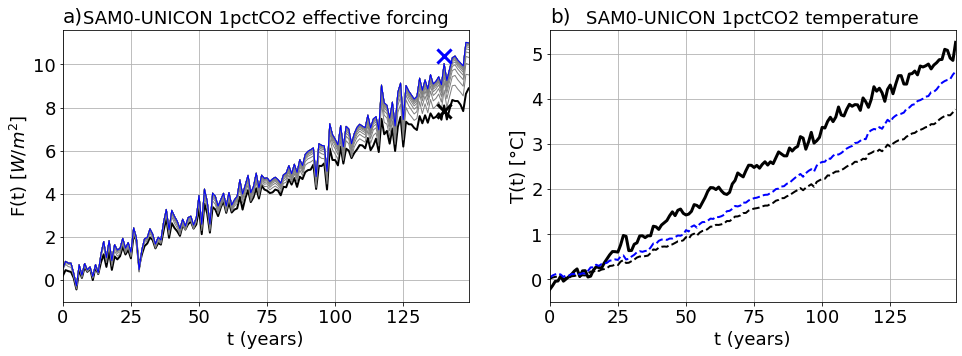

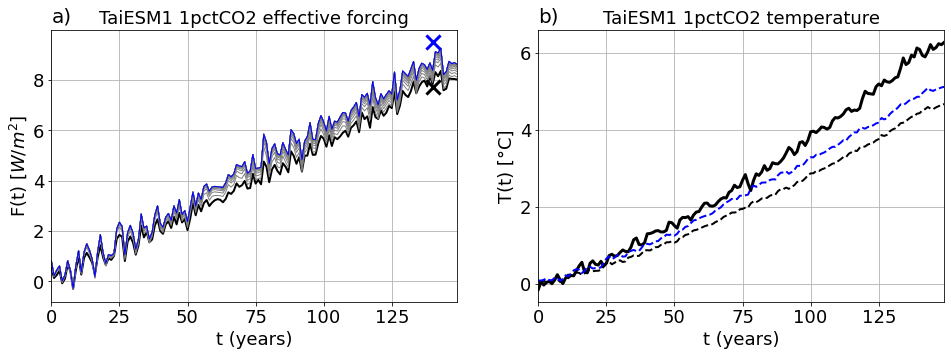

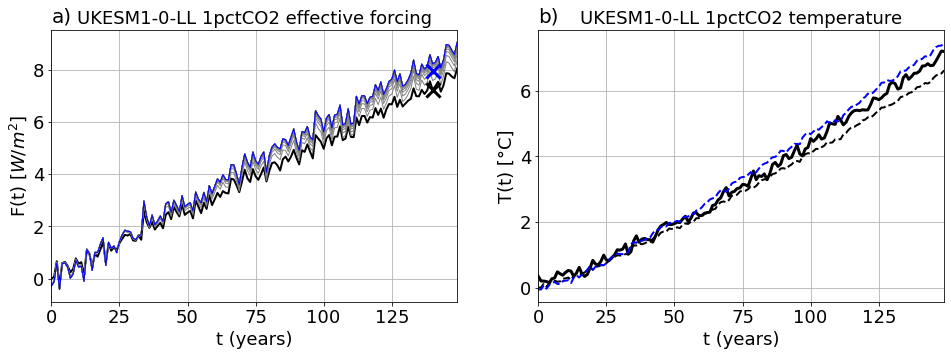

In [14]:
exp = '1pctCO2'
modeldir = '../Processed_data/Global_annual_anomalies/'

#for model in ['TaiESM1']:
#for model in ['UKESM1-0-LL']:
#for model in ['GISS-E2-1-G']:
for model in common_members:
    members = list(common_members[model])
    for member in members:
    #for member in ['r1i1p5f1']:
    
        exp_file = model + '_' + exp + '_' + member + '_anomalies.txt'
        data = pd.read_table(modeldir + model + '/' + exp + '/' + exp_file, index_col=0, sep = ',')

        N = data['rsdt'] - data['rsut'] - data['rlut']
        #if model == 'AWI-CM-1-1-MR':
        #    data['tas'][0]=0 # set an approximate value since it does not exist for some reason...

        years = np.arange(0, len(data));
        variables = list(data)
        units = [' [K]', ' [W/$m^2$]', ' [W/$m^2$]', ' [W/$m^2$]']

        if plot_allvar == True:
            # plot data for all variables
            fig, axes = plt.subplots(nrows=2,ncols=2,figsize = [16,10])
            fig.suptitle(model + ' historical and ' + exp + ' ' + member,fontsize = 18)
            ax = np.concatenate(axes)
            for (j, var) in enumerate(variables):
                ax[j].plot(years, data[var], linewidth=2,color = "black")
                ax[j].set_ylabel(var + ' ' + units[j],fontsize = 18)
                ax[j].set_xlabel('Year',fontsize = 18)
                ax[j].tick_params(axis='both',labelsize=18)
                ax[j].set_xlim(min(years),max(years))
                ax[j].grid()
        if plot_tasandN == True:
            # plot just tas and netTOA radiative imbalance
            fig, ax = plt.subplots(ncols=2,figsize = [16,5])
            fig.suptitle(model + ' ' + exp + ' ' + member,fontsize = 18)
            ax[0].plot(years, data['tas'], linewidth=2, color = "black"); ax[0].set_ylabel('tas [K]',fontsize = 18)
            ax[1].plot(years, N, linewidth=2, color = "black");  ax[1].set_ylabel('N [W/$m^2$]',fontsize = 18)
            for j in range(len(ax)):
                ax[j].set_xlabel('Year',fontsize = 18)
                ax[j].tick_params(axis='both',labelsize=18)
                ax[j].set_xlim(min(years),max(years))
                ax[j].grid()

        filename = 'best_estimated_osc_parameters.txt'
        parameter_table = pd.read_table('../Estimates/' + filename,index_col=0)
        parameter_table = parameter_table[parameter_table['member'] == member]
        GregoryT2x = parameter_table.loc[model,'GregoryT2x']
        GregoryF2x = parameter_table.loc[model,'GregoryF2x']
        fbpar = GregoryF2x/GregoryT2x #feedback parameter from Gregory plot
        #print(fbpar)

        F = N + fbpar*data['tas']

        if saveforcingdata == True: # using F13 method
            # create model directory if it does not already exist
            if os.path.isdir('../Estimates/Transient_forcing_estimates/' + model) == False:
                os.makedirs('../Estimates/Transient_forcing_estimates/' + model)
            # save file
            index = pd.Index(years, name='Year')
            df_F13 = pd.DataFrame(F.values, index=index, columns=['ERF'])
            modelfilename = model + '_' + exp + '_' + member + '_F13_ERF.txt'
            df_F13.to_csv('../Estimates/Transient_forcing_estimates/' + model + '/' + modelfilename, sep='\t')

        # load remaining parameters:
        taulist = np.array(parameter_table.loc[model,'tau_1':'T_q'])
        p = -1/taulist[2]; q = 2*np.pi/taulist[3] 
        a_n = np.array(parameter_table.loc[model,'S_1':'S_osc2'])
        b_n = np.array(parameter_table.loc[model,'b_1':'b_4'])
        F2x = parameter_table.loc[model,'F2x']
        #T2x = parameter_table.loc[model,'T2x']

        # compute other needed parameters from these:
        dim = len(taulist)

        #if any(a_n == 0):
        #    dim = np.count_nonzero(a_n[:dim])
        #    zeroindex = np.where(a_n == 0)[0]
        #    a_n = np.delete(a_n,zeroindex)
        #    b_n = np.delete(b_n,zeroindex)
        #    taulist = np.delete(taulist,zeroindex)

        #print(fbparlist)
        amplitudes = a_n[:dim]/(2*F2x*taulist); fbparlist = (b_n/a_n)[:dim] # true just for the exponential responses
        # so update values to the correct ones for the damped oscillations:
        amplitudes[2] = -a_n[2]*(p**2+q**2)/(q*2*F2x); fbparlist[2] = b_n[2]/(a_n[2] + a_n[3]) 
        amplitudes[3] =  a_n[3]*(p**2+q**2)/(p*2*F2x); fbparlist[3] = fbparlist[2]

        # compute components T_n(t) = exp(-t/tau_n)*F(t) (Here * is a convolution)
        dim = len(taulist)
        lf = len(F)
        predictors = np.full((lf,dim),np.nan)   

        # compute exact predictors by integrating greens function
        for k in range(0,dim):
            intgreensti = np.full((lf,lf),0.)   # remember dot after 0 to create floating point number array instead of integer
            for t in range(0,lf):
                # compute one new contribution to the matrix:
                if k < 2: # assuming the two first components correspond to exponential responses
                    intgreensti[t,0] = taulist[k]*(np.exp(-t/taulist[k]) - np.exp(-(t+1)/taulist[k]))
                elif k==2: # assuming k>=2 correspond to damped oscillatory solutions
                    # integral of exp(p*t)*sin(q*t)
                    intgreensti[t,0] = 1/(p**2+q**2)*(np.exp(p*t)*(p*np.sin(q*t)-q*np.cos(q*t)) - np.exp(p*(t+1))*(p*np.sin(q*(t+1))-q*np.cos(q*(t+1))))
                elif k==3:
                    # integral of exp(p*t)*cos(q*t)
                    intgreensti[t,0] = 1/(p**2+q**2)*(np.exp(p*t)*(q*np.sin(q*t)+p*np.cos(q*t)) - np.exp(p*(t+1))*(q*np.sin(q*(t+1))+p*np.cos(q*(t+1))))
                # take the rest from row above:
                if t > 0:
                    intgreensti[t,1:(t+1)] = intgreensti[t-1,0:t]
            # compute discretized convolution integral by this matrix product:
            predictors[:,k] = intgreensti@np.array(F)

        Tn = amplitudes*predictors


        if plot_modes == True:
            fig, ax = plt.subplots(figsize = [9,5]) 
            plt.plot(years,Tn[:,0],linewidth=2,color = "black",label = 'Mode with time scale ' + str(np.round(taulist[0])) + ' years')
            plt.plot(years,Tn[:,1],linewidth=2,color = "blue",label = 'Mode with time scale ' + str(np.round(taulist[1])) + ' years')
            if dim>2:
                plt.plot(years,Tn[:,2],linewidth=2,color = "red",label = 'Mode with time scale ' + str(np.round(taulist[2],1)) + ' years')
            ax.set_xlabel('t',fontsize = 18)
            ax.set_ylabel('T(t)',fontsize = 18)
            ax.set_title('Temperature responses to forcing',fontsize = 18)
            ax.grid()
            ax.set_xlim(min(years),max(years))
            ax.tick_params(axis='both',labelsize=22)
            ax.legend(loc=2, prop={'size': 18});



        # Compute new estimate of forcing
        it = 20  # number of iterations
        Fiarray = np.full((lf,it),np.nan)  

        Fi = F
        for i in range(0,it):

            # iterate
            predictors = np.full((lf,dim),np.nan)   

            # compute exact predictors by integrating greens function
            for k in range(0,dim):
                intgreensti = np.full((lf,lf),0.)   # remember dot after 0 to create floating point number array instead of integer
                for t in range(0,lf):
                   # compute one new contribution to the matrix:
                    if k < 2: # assuming the two first components correspond to exponential responses
                        intgreensti[t,0] = taulist[k]*(np.exp(-t/taulist[k]) - np.exp(-(t+1)/taulist[k]))
                    elif k==2: # assuming k>=2 correspond to damped oscillatory solutions
                        # integral of exp(p*t)*sin(q*t)
                        intgreensti[t,0] = 1/(p**2+q**2)*(np.exp(p*t)*(p*np.sin(q*t)-q*np.cos(q*t)) - np.exp(p*(t+1))*(p*np.sin(q*(t+1))-q*np.cos(q*(t+1))))
                    elif k==3:
                        # integral of exp(p*t)*cos(q*t)
                        intgreensti[t,0] = 1/(p**2+q**2)*(np.exp(p*t)*(q*np.sin(q*t)+p*np.cos(q*t)) - np.exp(p*(t+1))*(q*np.sin(q*(t+1))+p*np.cos(q*(t+1))))

                    # take the rest from row above:
                    if t > 0:
                        intgreensti[t,1:(t+1)] = intgreensti[t-1,0:t]
                # compute discretized convolution integral by this matrix product:
                predictors[:,k] = intgreensti@np.array(Fi)

            Tni = amplitudes*predictors
            Fi = N + Tni@fbparlist
            Fiarray[:,i] = Fi

        fig, ax = plt.subplots(nrows=1,ncols=2,figsize = [16,5])
        ax[0,].plot(years,F,linewidth=2,color = "black",label = "Old forcing")
        for i in range(0,it-1):
            ax[0,].plot(years,Fiarray[:,i],linewidth=1,color = "gray")
        ax[0,].plot(years,Fiarray[:,it-1],linewidth=1,color = "blue",label = "New forcing")
        ax[0,].scatter([140],[2*GregoryF2x],linewidth=3, color = "black",label = "Forcing from abrupt-4xCO2", marker = 'x', s=200,zorder=1000)
        ax[0,].scatter([140],[2*F2x],linewidth=3, color = "blue",label = "Forcing from abrupt-4xCO2", marker = 'x', s=200,zorder=1000)
       
    
        ax[0,].set_xlabel('t (years)',fontsize = 18)
        ax[0,].set_ylabel('F(t) [$W/m^2$]',fontsize = 18)
        ax[0,].grid()
        ax[0,].set_xlim(min(years),max(years))
        ax[0,].tick_params(axis='both',labelsize=18)  

        # compare responses
        label = 'temperature'
        # plot temperature
        ax[1,].plot(years,data['tas'],linewidth=3,color = "black",label = model + " modelled response")

        # plot response
        ax[1,].plot(years,np.sum(Tn,axis=1),'--',linewidth=2,color = "black",label = "Linear response to old forcing")
        ax[1,].plot(years,np.sum(Tni,axis=1),'--',linewidth=2,color = "blue",label = "Linear response to new forcing")
        ax[1,].set_xlabel('t (years)',fontsize = 18)
        ax[1,].set_ylabel('T(t) [°C]',fontsize = 18)
        ax[1,].set_title(model + ' ' + exp + ' ' + label,fontsize = 18)
        ax[0,].set_title(model + ' ' + exp + ' effective forcing',fontsize = 18)

        ax[1,].grid()
        ax[1,].set_xlim(min(years),max(years))
        ax[1,].tick_params(axis='both',labelsize=18)

        ax[0,].text(0,1.03,'a)',transform=ax[0,].transAxes, fontsize=20)
        ax[1,].text(0,1.03,'b)',transform=ax[1,].transAxes, fontsize=20)

        if saveforcingfigure == True:
            plt.savefig('../Figures/Transient_forcing_response/' + model + '_' + exp + '_' + member + '_forcing_and_response.pdf', format='pdf', dpi=600, bbox_inches="tight")


        if saveforcingdata == True: # using new method
            # save file
            index = pd.Index(years, name='Year')
            df_F = pd.DataFrame(F.values, index=index, columns=['ERF'])
            modelfilename = model + '_' + exp + '_' + member + '_ERF.txt'
            df_F.to_csv('../Estimates/Transient_forcing_estimates/' + model + '/' + modelfilename, sep='\t')
        


In [69]:
parameter_table.loc[model]

member           r1i1p1f1
tau1              1.27131
tau2              6.53793
tau_p                 400
T_q               1568.22
S_1               1.74124
S_2               2.08333
S_3                1.8225
S_4               3.64493
b_1               1.14187
b_2                3.7962
b_3               2.22264
b_4           1.26661e-09
F2x               3.58035
GregoryF2x        3.93197
GregoryT2x        2.71546
Name: GISS-E2-1-G, dtype: object

In [71]:
fbparlist

array([0.6557783218486426, 1.8221786054715867, 0.4065229086940114,
       0.4065229086940114], dtype=object)

In [72]:
amplitudes

array([0.19127187777123342, 0.04450020655160564, 0.0022705301297014954,
       0.002833454027109397], dtype=object)

In [73]:
a_n

array([1.7412406803220437, 2.083327892879292, 1.8225036965879635,
       3.6449283683588014], dtype=object)

In [56]:
data['tas']

0     -0.017874
1      0.069538
2      0.119629
3     -0.194376
4     -0.155341
         ...   
146    2.103086
147    2.072696
148    2.120301
149    1.990240
150    2.131943
Name: tas, Length: 151, dtype: float64

In [ ]:
F = N + fbpar*data['tas']

In [57]:
fbpar

GISS-E2-1-G    1.573927
GISS-E2-1-G    1.447991
GISS-E2-1-G    1.511865
GISS-E2-1-G    1.579494
dtype: float64